First, download the membership matrix from https://github.com/NoamShental/PBEST/blob/master/mFiles/poolingMatrix.mat 

Then put the file 'poolingMatrix.mat' inside '/tests/data/' folder. 

In [1]:
COVID_dir = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling' # set this to your directory
import sys
sys.path.insert(1, COVID_dir) 

In [2]:
import scipy.io
import numpy as np
from test import test_RS, test_M
from util import simulate_x
import matplotlib.pyplot as plt
import os
import json
from membership_matrix import generate_doubly_regular_col

In [3]:
if not os.path.exists("./results/"):
    os.mkdir('results')

In [4]:
num_trials = 1000
n = 384
ks = list(range(1, 10)) 

In [4]:
for k in ks: 
    simulate_x(n, k/n, num_trials) 

On average, 0.99 positives in each trail.
On average, 2.00 positives in each trail.
On average, 2.90 positives in each trail.
On average, 4.00 positives in each trail.
On average, 5.03 positives in each trail.
On average, 6.02 positives in each trail.
On average, 6.80 positives in each trail.
On average, 7.89 positives in each trail.
On average, 9.20 positives in each trail.


In [5]:
results = []
for k in ks: 
    print(k)
    results.append(test_RS(k/384, fpr=0, fnr=0, num_trials=num_trials)) 

1
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Starting trial 500
Starting trial 600
Starting trial 700
Starting trial 800
Starting trial 900
2
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Starting trial 500
Starting trial 600
Starting trial 700
Starting trial 800
Starting trial 900
3
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Starting trial 500
Starting trial 600
Starting trial 700
Starting trial 800
Starting trial 900
4
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Starting trial 500
Starting trial 600
Starting trial 700
Starting trial 800
Starting trial 900
5
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Starting trial 500
Starting trial 600
Starting trial 700
Starting trial 800
Starting trial 900
6
Starting trial 0
Starting trial 100
Starting tri

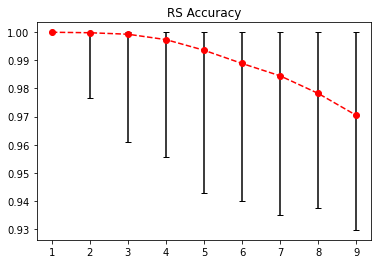

In [28]:
accuracy = []
upper = [] 
lower = [] 
for info in results:
    num_errors = info["num_errors"] 
    
    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 
    
    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(ks, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.title("RS Accuracy")
plt.savefig("./results/RS-Accuracy-numTrials%s" % num_trials)

In [32]:
with open("./results/RS-Accuracy-numTrials%s.txt" % num_trials, 'w') as outfile:
    json.dump(results, outfile)

# Doubly Regular, f = 9/384, Fix number of pools = 48

In [5]:
f = 9/384
T = 48
ms = list(range(1, 10)) 

In [ ]:
results = []
for m in ms: 
    print(m)
    M = generate_doubly_regular_col((T, n), m)
    results.append(test_M(M, f, fpr=0, fnr=0, num_trials=num_trials)) 

1
Starting trial 0
Starting trial 100
Starting trial 200
Starting trial 300
Starting trial 400
Starting trial 500
Starting trial 600
Starting trial 700
Starting trial 800
Starting trial 900
2
Starting trial 0
Starting trial 100
Starting trial 200


In [ ]:
accuracy = []
upper = [] 
lower = [] 

for info in results:
    num_errors = info["num_errors"] 

    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 

    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(ms, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Column Weights')
plt.ylabel('Accuracy')
plt.title('Doubly Regular Accuracy for f = %.4f' % f)
plt.savefig("./results/doubly-regular-f%.4f-numTrials%s" % (f, num_trials)) 

In [ ]:
with open("./results/doubly-regular-numTrials%s.txt" % num_trials, 'w') as outfile:
    json.dump(results, outfile)

# Constant Column Weight

In [ ]:
from membership_matrix import generate_const_col_weight

In [ ]:
f = 9/384
T = 48
ms = list(range(1, 10)) 

In [ ]:
results = []
for m in ms: 
    print(m)
    M = generate_const_col_weight((T, n), m)
    results.append(test_M(M, f, fpr=0, fnr=0, num_trials=num_trials)) 

In [ ]:
accuracy = []
upper = [] 
lower = [] 

for info in results:
    num_errors = info["num_errors"] 

    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 

    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(ms, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Column Weights')
plt.ylabel('Accuracy')
plt.title('Constant Column Weights Accuracy for f = %.4f' % f)
plt.savefig("./results/const-col-f%.4f-numTrials%s" % (f, num_trials)) 

In [ ]:
with open("./results/const-col-numTrials%s.txt" % num_trials, 'w') as outfile:
    json.dump(results, outfile)

# Constant Row 

In [ ]:
from membership_matrix import generate_const_row_weight

In [ ]:
f = 9/384
T = 48
ms = list(range(10, 80, 2))

In [ ]:
results = []
for m in ms: 
    print(m)
    M = generate_const_row_weight((T, n), m)
    results.append(test_M(M, f, fpr=0, fnr=0, num_trials=num_trials)) 

In [ ]:
accuracy = []
upper = [] 
lower = [] 

for info in results:
    num_errors = info["num_errors"] 

    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 

    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(ms, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Row Weights')
plt.ylabel('Accuracy')
plt.title('Constant Row Weights Accuracy for f = %.4f' % f)
plt.savefig("./results/const-row-f%.4f-numTrials%s" % (f, num_trials)) 

In [ ]:
with open("./results/const-row-numTrials%s.txt" % num_trials, 'w') as outfile:
    json.dump(results, outfile)

# Doubly Regular Row

In [ ]:
from membership_matrix import generate_doubly_regular_row

In [ ]:
f = 9/384
T = 48
ms = list(range(10, 80, 2))

In [ ]:
results = []
for m in ms: 
    print(m)
    M = generate_doubly_regular_row((T, n), m)
    results.append(test_M(M, f, fpr=0, fnr=0, num_trials=num_trials)) 

In [ ]:
accuracy = []
upper = [] 
lower = [] 

for info in results:
    num_errors = info["num_errors"] 

    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 

    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(ms, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Row Weights')
plt.ylabel('Accuracy')
plt.title('Doubly Regular Row Weights Accuracy for f = %.4f' % f)
plt.savefig("./results/doubly-regular-row-f%.4f-numTrials%s" % (f, num_trials)) 